# Домашня робота №7

# Перетворення випадкових величин

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## 1 Квантильне перетворення

### 1.1 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

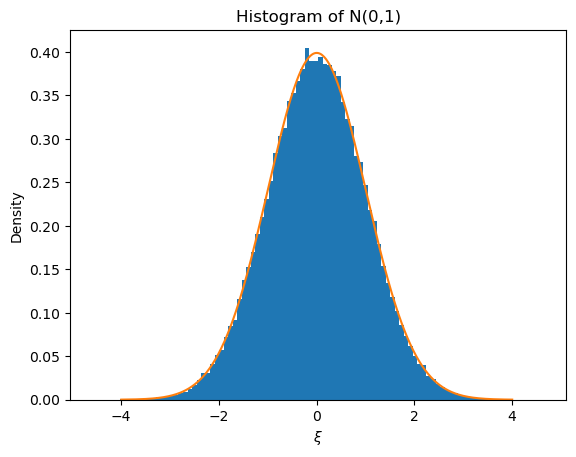

In [2]:

n = 100000


u = np.random.rand(n)
xi = norm.ppf(u)

plt.figure()
plt.hist(xi, bins=100, density=True)
x = np.linspace(-4, 4, 400)
pdf = norm.pdf(x)
plt.plot(x, pdf)
plt.xlabel(r'$\xi$')
plt.ylabel('Density')
plt.title('Histogram of N(0,1)')
plt.show()


## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

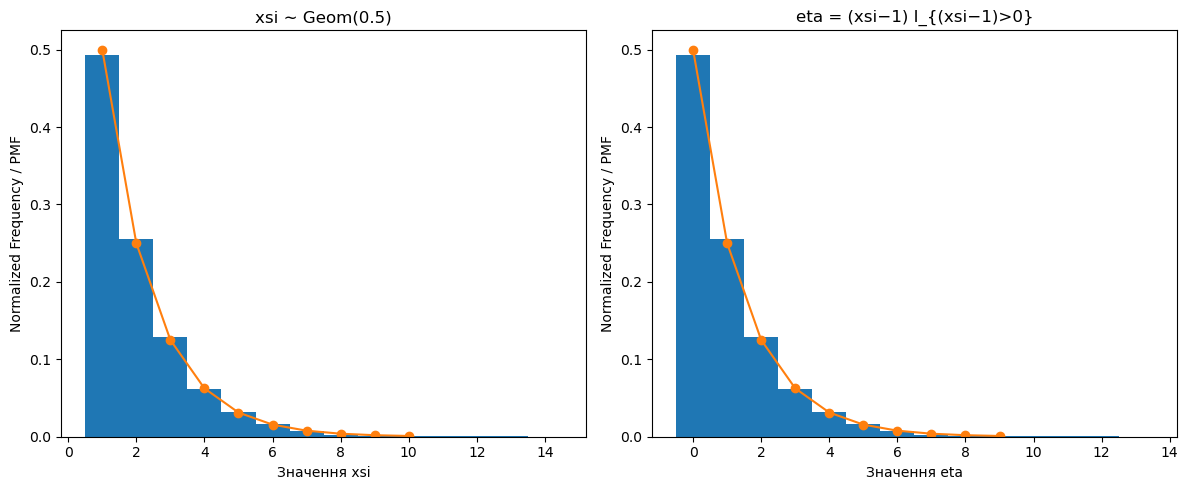

In [3]:
import numpy as np
import matplotlib.pyplot as plt


n = 10000
p = 0.5
xi = np.random.geometric(p, size=n)


eta = (xi - 1) * (xi - 1 > 0)


k = np.arange(1, 11)
pmf_xi = p * (1 - p)**(k - 1)


j = np.arange(0, 10)
pmf_eta = p * (1 - p)**j


bins_xi = np.arange(0.5, xi.max() + 1.5, 1)
bins_eta = np.arange(-0.5, eta.max() + 1.5, 1)


fig, axs = plt.subplots(1, 2, figsize=(12, 5))


axs[0].hist(xi, bins=bins_xi, density=True, align='mid')
axs[0].plot(k, pmf_xi, marker='o', linestyle='-')
axs[0].set_title('xsi ∼ Geom(0.5)')
axs[0].set_xlabel('Значення xsi')
axs[0].set_ylabel('Normalized Frequency / PMF')


axs[1].hist(eta, bins=bins_eta, density=True, align='mid')
axs[1].plot(j, pmf_eta, marker='o', linestyle='-')
axs[1].set_title('eta = (xsi−1) I_{(xsi−1)>0}')
axs[1].set_xlabel('Значення eta')
axs[1].set_ylabel('Normalized Frequency / PMF')

plt.tight_layout()
plt.show()


## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

**Текст, выделенный полужирным шрифтом**### 3.1 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

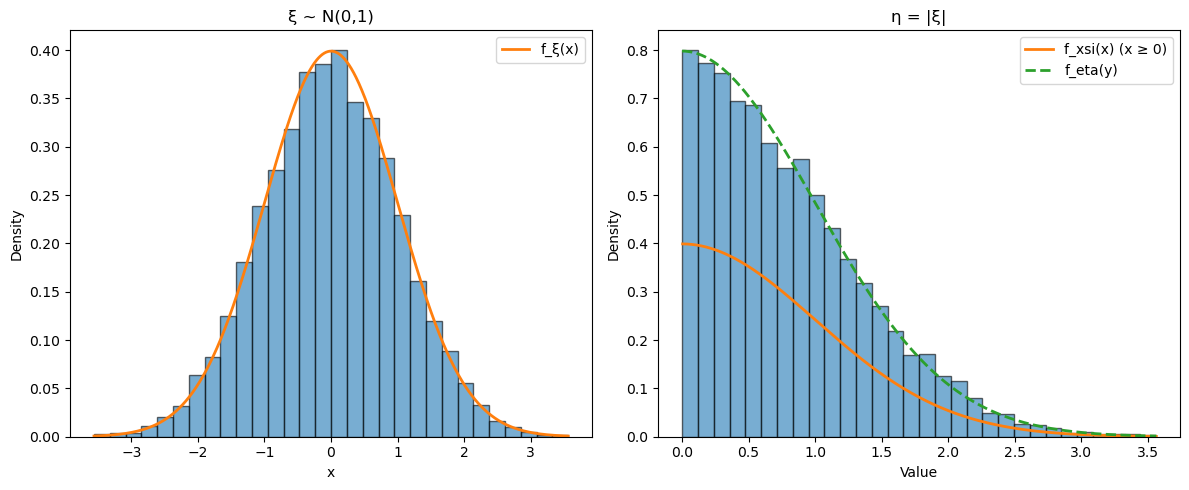

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


n = 10000
xi = np.random.randn(n)


eta = np.abs(xi)


x = np.linspace(xi.min(), xi.max(), 1000)
density_x = norm.pdf(x, 0, 1)


y = np.linspace(0, eta.max(), 1000)
density_eta = 2 * norm.pdf(y, 0, 1) 


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(xi, bins=30, density=True, alpha=0.6, edgecolor='black')
axes[0].plot(x, density_x, lw=2, label='f_ξ(x)')
axes[0].set_title('ξ ~ N(0,1)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Density')
axes[0].legend()


axes[1].hist(eta, bins=30, density=True, alpha=0.6, edgecolor='black')

x_pos = x[x >= 0]
density_x_pos = density_x[x >= 0]
axes[1].plot(x_pos, density_x_pos, lw=2, label='f_xsi(x) (x ≥ 0)')
axes[1].plot(y, density_eta, lw=2, linestyle='--', label='f_eta(y)')
axes[1].set_title('η = |ξ|')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()


## 4 Одиничний квадрат

Реалізуйте випадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

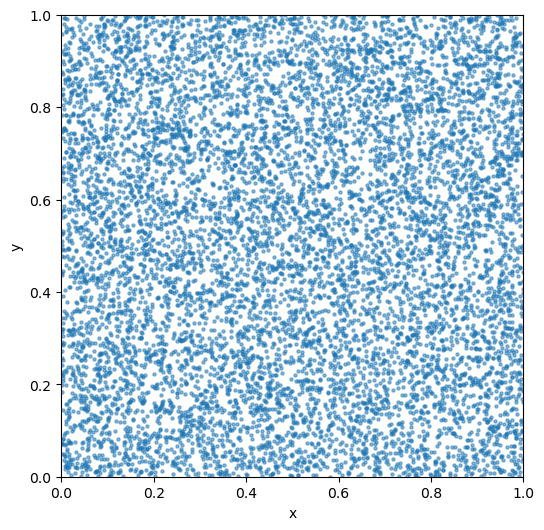

In [7]:
import numpy as np
import matplotlib.pyplot as plt


n = 10000
xi = np.random.rand(n, 2)
x, y = xi[:, 0], xi[:, 1]


plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=5, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', 'box')
plt.show()


Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

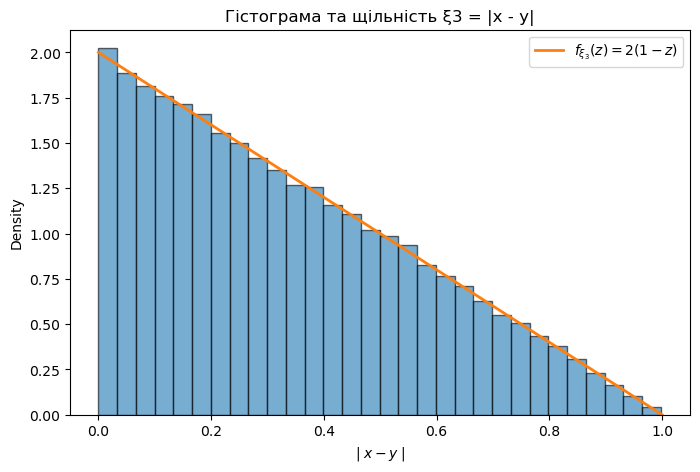

In [11]:
n2 = 100_000
xi2 = np.random.rand(n2, 2)
x2, y2 = xi2[:, 0], xi2[:, 1]
d2 = np.abs(x2 - y2)

plt.figure(figsize=(8, 5))
plt.hist(d2, bins=30, density=True, alpha=0.6, edgecolor='black')
z = np.linspace(0, 1, 1000)
plt.plot(z, 2 * (1 - z), linewidth=2, label=r'$f_{\xi_3}(z)=2(1-z)$')
plt.xlabel(r'$|\;x - y\;|$')
plt.ylabel('Density')
plt.title('Гістограма та щільність ξ3 = |x - y|')
plt.legend()
plt.show()